Tommaso Peritore

In [8]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.

import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers.legacy import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

import os
import numpy as np
import matplotlib.pyplot as plt

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# 12.1

Change at will and train your DNN by increasing the number of epochs to an adequate value. Try to use at least two other optimizers, different from SGD: watch the accuracy and loss for training and validation data and comment on the performances.

## Solution

### Premises 
The problem we are dealing with is the classification of the MNIST dataset. It is a dataset of handwritten digits, from $0$ to $9$, and it is a well-known dataset in the machine learning world. The digits come as a square image, divided into a $28\times 28$ pixel grid. For each pixel we are given the value of gray it assumes, ranging from white to bllack, i.e. from $0$ to $255$. 

The code needed to build the Deep Neural Network (DNN) was already provided in the exercise text. I will start from that code and then modify the number of epochs and the optimizer to find a satisfying combination of parameters. 

I will set the number of epochs to a high number, in order to allow the model to train for a longer time. From the plots of the loss in function of the epochs, I will be able to see when the model reaches a plateau and stops improving.

On the other hand, for the optimizers, I will explore a few, listed below for use in the code.

In [9]:
# Exploring variations

trial_optimizers = [SGD, RMSprop, Adagrad, Adam]
trial_optimizers_names = ['SGD', 'RMSprop', 'Adagrad', 'Adam']

### Data import and formatting
`Keras` has the ability to easily download the MNIST data from the web. To do this, in the box at the beginning of the exercise I've imported the `mnist` module and I will use the `load_data` method, and the training and test data set will be generated.

Unlike for previous exercises, we don't need to provided the number of training and testind data, as MNIST has predefined test and training sets, in order to facilitate the comparison of the performance of different models on the data.
<br> Once loaded, the data needs proper formatting to be used in the DNN. The images are 28x28 pixels, and the pixel values are in the range [0, 255]. I will normalize the pixel values to be in the range [0, 1] by dividing by 255. Finally, I will turn the output data to categorical, as the output of the DNN will be a probability distribution over the 10 classes.

In [10]:
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
#print('Before to_categorical: ')
#print('X_train shape:', X_train.shape)
#print('X_test shape:', X_test.shape)

# cast floats to single precision, and rescale to interval [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
#print('After to_categorical: ')
#print('X_train shape:', X_train.shape)
#print('Y_train shape:', Y_train.shape)

### Network initialization
Now we are ready to initialize the network. Through the Sequential class of Keras, I will instantiate a model and gradually add different layers using the _add_ method. 
I will use the same architecture as in the exercise text, with 2 hidden layers of 400 and 100 neurons, respectively. For the first layer we need to specify the input shape, which is the number of pixels in the images from MNIST, i.e. $28\times 28 = 784$. 

The activation function will be `relu` for the hidden layers and `softmax` for the output layer. The loss function will be `categorical_crossentropy`, as we are dealing with a classification problem. The optimizer will be one of the ones listed below.

Before the output layer, in the construction of the network we used the `Dropout` layer. This is a regularization technique that helps to prevent overfitting during training. It works by randomly setting a fraction of input units to 0 (effectively disabling random neurons) at each update during training time to reduce interdependence of different neurons. This might have a hit on accuracy during training, but it forces the model to learn the more substantial features of the data, improving generalization. 

Of course the dropout layer is not used during testing, as we want to use all the neurons to make predictions. This allows the model to benefit from all the weak classifiers present in the neural network, which have been trained with different subsets of the data (subset of active neurons) during training. As a result, the accuracy during testing can improve compared to training, as the model can effectively combine the predictions of all the weak classifiers to get better results on new data that have not been used during training.

In [11]:
def create_DNN():
   # instantiate model
   model = Sequential()
   # add a dense all-to-all relu layer
   model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
   # add a dense all-to-all relu layer
   model.add(Dense(100, activation='relu'))
   # apply dropout with rate 0.5
   model.add(Dropout(0.5))
   # soft-max layer
   model.add(Dense(num_classes, activation='softmax'))
   
   return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [12]:
def compile_model(int_optimizers):
   # create the model
   model = create_DNN()
   # compile the model
   optimizer = trial_optimizers[int_optimizers]()
   model.compile( loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['acc'])
   return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


Optimizer:  SGD
Epoch 1/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7750 - acc: 0.7730 - val_loss: 0.3149 - val_acc: 0.9121
Epoch 2/30
1875/1875 [==============================] - 2s 995us/step - loss: 0.3848 - acc: 0.8908 - val_loss: 0.2411 - val_acc: 0.9308
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3087 - acc: 0.9128 - val_loss: 0.2007 - val_acc: 0.9422
Epoch 4/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2628 - acc: 0.9261 - val_loss: 0.1736 - val_acc: 0.9475
Epoch 5/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2313 - acc: 0.9348 - val_loss: 0.1602 - val_acc: 0.9510
Epoch 6/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2058 - acc: 0.9426 - val_loss: 0.1413 - val_acc: 0.9560
Epoch 7/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1883 - acc: 0.9463 - val_loss: 0.1295 - val_acc: 0.9594
Epoch 8/30
1875/1875 [======================

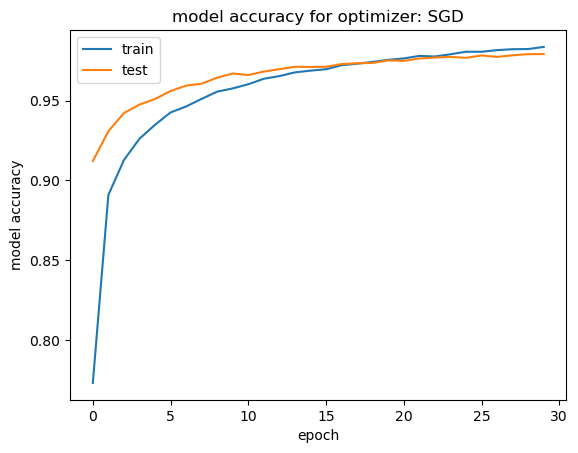

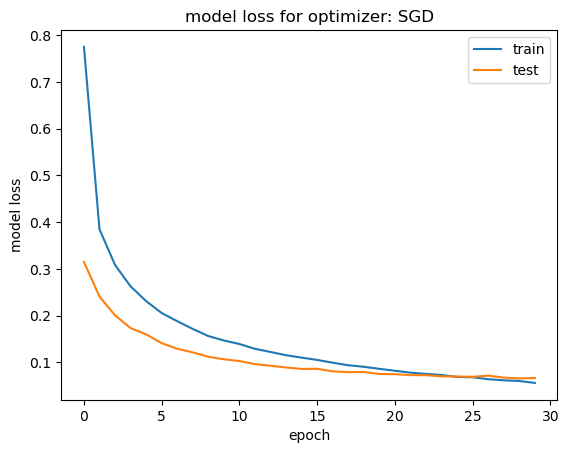

Optimizer:  RMSprop
Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2900 - acc: 0.9164 - val_loss: 0.1389 - val_acc: 0.9642
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1530 - acc: 0.9626 - val_loss: 0.1348 - val_acc: 0.9701
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1421 - acc: 0.9684 - val_loss: 0.1428 - val_acc: 0.9693
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1400 - acc: 0.9705 - val_loss: 0.1387 - val_acc: 0.9742
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1496 - acc: 0.9710 - val_loss: 0.1704 - val_acc: 0.9738
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1476 - acc: 0.9723 - val_loss: 0.1812 - val_acc: 0.9742
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1525 - acc: 0.9725 - val_loss: 0.1735 - val_acc: 0.9770
Epoch 8/30
1875/1875 [====================

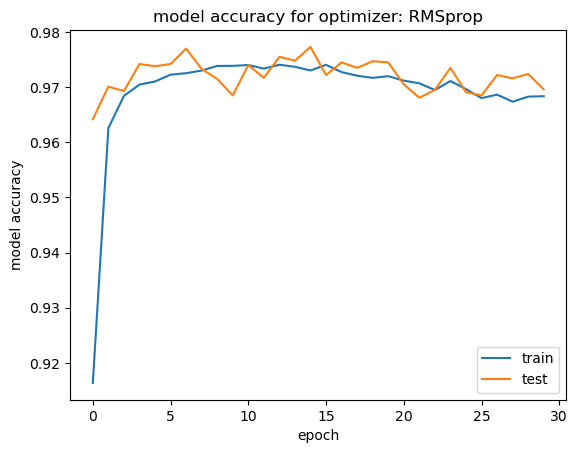

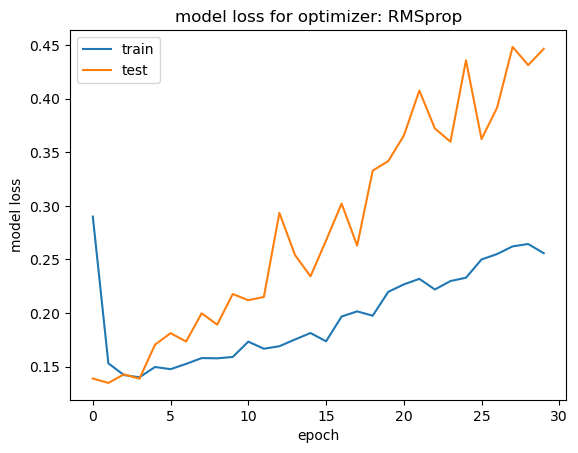

Optimizer:  Adagrad
Epoch 1/30
1875/1875 [==============================] - 2s 1ms/step - loss: 1.3420 - acc: 0.6040 - val_loss: 0.6502 - val_acc: 0.8624
Epoch 2/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7209 - acc: 0.7926 - val_loss: 0.4490 - val_acc: 0.8919
Epoch 3/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5818 - acc: 0.8328 - val_loss: 0.3789 - val_acc: 0.9035
Epoch 4/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5153 - acc: 0.8534 - val_loss: 0.3411 - val_acc: 0.9110
Epoch 5/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4733 - acc: 0.8656 - val_loss: 0.3169 - val_acc: 0.9151
Epoch 6/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4433 - acc: 0.8721 - val_loss: 0.2985 - val_acc: 0.9193
Epoch 7/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4191 - acc: 0.8808 - val_loss: 0.2839 - val_acc: 0.9224
Epoch 8/30
1875/1875 [====================

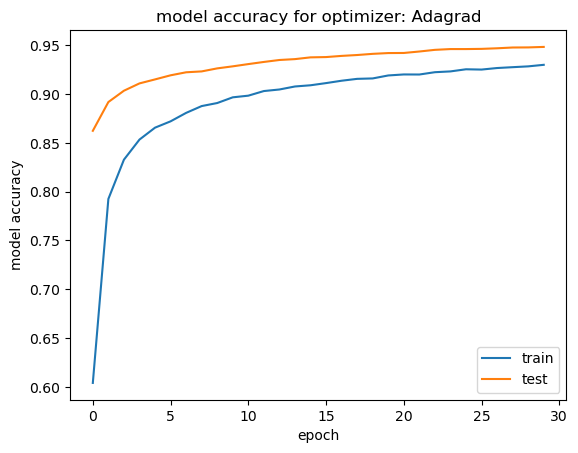

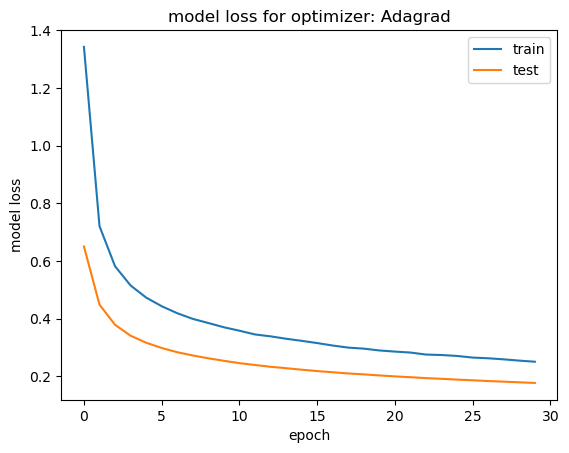

Optimizer:  Adam
Epoch 1/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2785 - acc: 0.9182 - val_loss: 0.1229 - val_acc: 0.9601
Epoch 2/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1234 - acc: 0.9643 - val_loss: 0.0885 - val_acc: 0.9720
Epoch 3/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0862 - acc: 0.9745 - val_loss: 0.0839 - val_acc: 0.9743
Epoch 4/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0682 - acc: 0.9794 - val_loss: 0.0783 - val_acc: 0.9763
Epoch 5/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0562 - acc: 0.9823 - val_loss: 0.0842 - val_acc: 0.9770
Epoch 6/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0485 - acc: 0.9852 - val_loss: 0.0867 - val_acc: 0.9776
Epoch 7/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0409 - acc: 0.9872 - val_loss: 0.1007 - val_acc: 0.9773
Epoch 8/30
1875/1875 [=======================

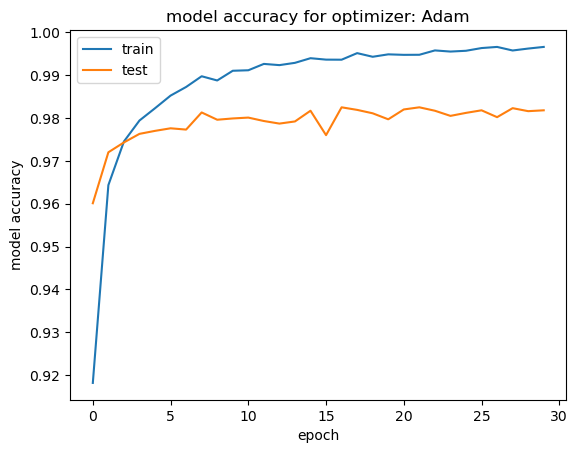

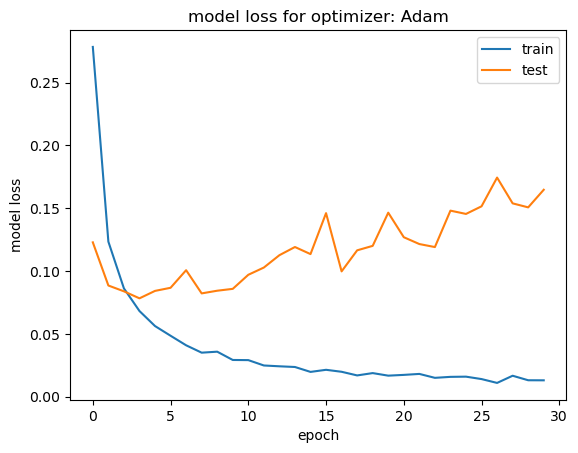

In [14]:
# training parameters
batch_size = 32
epochs = 30

loss = []
accuracy = []

# create the deep neural net
for i in range(len(trial_optimizers)):
	print('Optimizer: ', trial_optimizers_names[i])
	model_DNN = compile_model(i)
	history = model_DNN.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=1,
							validation_data=(X_test, Y_test))
	score = model_DNN.evaluate(X_test, Y_test, verbose=1)
	# print performance
	print()
	print('Test loss:', score[0])
	print('Test accuracy:', score[1])
	loss.append(score[0])
	accuracy.append(score[1])

	# look into training history

	# summarize history for accuracy
	plt.plot(history.history['acc'])
	plt.plot(history.history['val_acc'])
	plt.title('model accuracy for optimizer: ' + trial_optimizers_names[i])
	plt.ylabel('model accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'test'], loc='best')
	plt.show()

	# summarize history for loss
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss for optimizer: ' + trial_optimizers_names[i])
	plt.ylabel('model loss')
	plt.xlabel('epoch')
	plt.legend(['train', 'test'], loc='best')
	plt.show()


In [ ]:
for i in range(len(trial_optimizers)):
	score = score[i]
	history = history[i]
	# print performance
	print()
	print('Test loss:', score[0])
	print('Test accuracy:', score[1])

	# look into training history

	# summarize history for accuracy
	plt.plot(history.history['acc'])
	plt.plot(history.history['val_acc'])
	plt.ylabel('model accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'test'], loc='best')
	plt.show()

	# summarize history for loss
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.ylabel('model loss')
	plt.xlabel('epoch')
	plt.legend(['train', 'test'], loc='best')
	plt.show()

Dropout, during training, slices off some artificial neurons, thus, training accuracy suffers.

Dropout, during testing, turns itself off and allows all of the ‘weak classifiers’ in the neural network to be used. Thus, testing accuracy improves with respect to training accuracy.

In [ ]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize = (15,4))
for i in range(30):    
    ax = plt.subplot(3, 10, i + 1)    
    plt.imshow(x_test[i, :, :, 0], cmap = 'gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off')
    plt.subplots_adjust(hspace = 0.8)
plt.show()